In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
wine = pd.read_csv("winequality-white.csv", sep=";")
wine["quality"].value_counts()

# poistetaan duplikaatit
wine.drop_duplicates(inplace=True)

In [103]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [104]:
colnames = wine.columns
colnames

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [105]:
# selittävät muuttujat
X = wine.loc[:, "fixed acidity":"alcohol"]
# vastemuuttuja
Y = wine.loc[:, "quality"]

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2 #, random_state=42
)  # todelliset X ja Y

print(X_train.shape)
print(X_test.shape)

(3168, 11)
(793, 11)


# Mallinnus

In [107]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [117]:
wine['quality_label'] = wine['quality'].apply(lambda quality: 1 if quality > 5 else 0)
print(wine[['quality', 'quality_label']].head())
wine.head(15)



   quality  quality_label
0        6              1
1        6              1
2        6              1
3        6              1
6        6              1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,0
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,0
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5,0
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,1


In [108]:
print(tree.export_text(classifier, feature_names=colnames[:11]))

|--- alcohol <= 10.75
|   |--- volatile acidity <= 0.24
|   |   |--- alcohol <= 10.05
|   |   |   |--- class: 6
|   |   |--- alcohol >  10.05
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- class: 5
|   |   |--- alcohol >  9.85
|   |   |   |--- class: 6
|--- alcohol >  10.75
|   |--- alcohol <= 12.55
|   |   |--- free sulfur dioxide <= 11.50
|   |   |   |--- class: 5
|   |   |--- free sulfur dioxide >  11.50
|   |   |   |--- class: 6
|   |--- alcohol >  12.55
|   |   |--- chlorides <= 0.05
|   |   |   |--- class: 7
|   |   |--- chlorides >  0.05
|   |   |   |--- class: 6



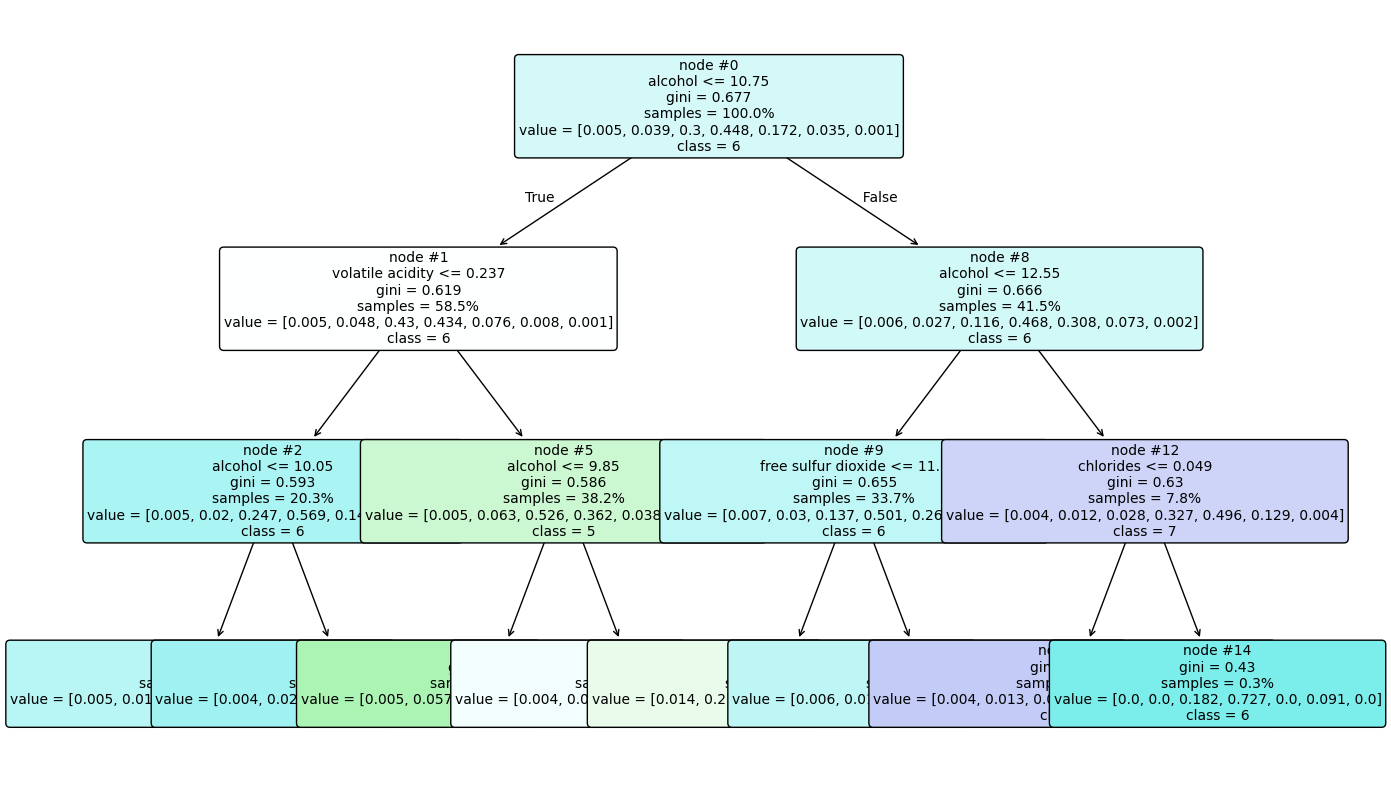

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Convert class names to strings
class_names = [str(cls) for cls in classifier.classes_]

tree.plot_tree(
    classifier,
    node_ids=True,
    class_names=class_names,
    filled=True,
    proportion=True,
    rounded=True,
    feature_names=colnames,
    fontsize=10,
)
plt.show()

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [111]:
# lasketaan ennusteet  x_test-joukosta (test_split mallinnusvaiheessa ennen mallinnusta)
Y_pred = classifier.predict(X_test)  # ennusteet lasketaan x_test-joukosta

cm = confusion_matrix(
    Y_test, Y_pred, normalize="all"
)  # verrataan todellisia ennusteeseen
print(f"Sekaannusmatriisi:\n {cm}")

tarkkuus = accuracy_score(Y_test, Y_pred)  # verrataan todellisia ennusteeseen

print("\ntarkkuus on laskettu opetusjoukosta = %.3f\n" % (tarkkuus))

print("classification_report: \n")
print(classification_report(Y_test, Y_pred, zero_division=1))

Sekaannusmatriisi:
 [[0.         0.         0.00126103 0.00252207 0.         0.
  0.        ]
 [0.         0.         0.01891551 0.01639344 0.00126103 0.
  0.        ]
 [0.         0.         0.14754098 0.13619168 0.00126103 0.
  0.        ]
 [0.         0.         0.07440101 0.36443884 0.02522068 0.
  0.        ]
 [0.         0.         0.00504414 0.14375788 0.03278689 0.
  0.        ]
 [0.         0.         0.         0.01891551 0.0075662  0.
  0.        ]
 [0.         0.         0.         0.00126103 0.00126103 0.
  0.        ]]

tarkkuus on laskettu opetusjoukosta = 0.545

classification_report: 

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         3
           4       1.00      0.00      0.00        29
           5       0.60      0.52      0.55       226
           6       0.53      0.79      0.64       368
           7       0.47      0.18      0.26       144
           8       1.00      0.00      0.00        21
           

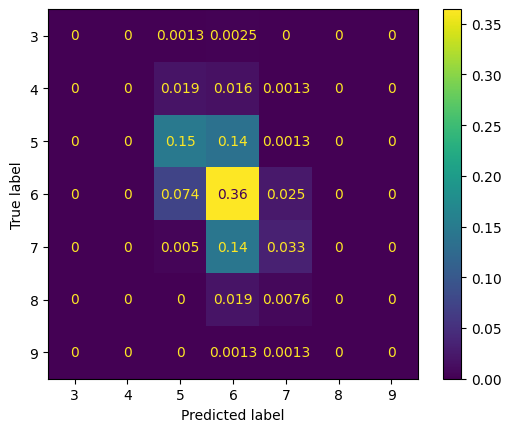

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

# Ensure the number of display labels matches the number of classes
cmd = ConfusionMatrixDisplay(cm, display_labels=sorted(Y_test.unique()))
cmd.plot()
plt.show()

In [113]:
# ristiinvalidointi
"""
Variables:
    classifier: The machine learning model to be evaluated.
    X: Features of the dataset.
    Y: Labels of the dataset.

Functionality:
    - Uses `cross_val_score` to perform 5-fold cross-validation on the provided classifier.
    - Prints the cross-validation scores.

Usage:
    Ensure that `classifier`, `X`, and `Y` are defined before running this script.
"""
from sklearn.model_selection import cross_val_score

# kierrosten määrä
k = 5

scores = cross_val_score(estimator=classifier, X=X, y=Y, scoring="accuracy", cv=k)

print(f"tarkkuudet on laskettu {k} yksittäisellä kierroksella")
print(f"\ntarkkuudet: {scores}")
print(f"\nkierrosten keskiarvo {k} kierroksella = {scores.mean():.3f}")

tarkkuudet on laskettu 5 yksittäisellä kierroksella

tarkkuudet: [0.49180328 0.49116162 0.52146465 0.5        0.48232323]

kierrosten keskiarvo 5 kierroksella = 0.497
